In [4]:
import sys
import logging
from uuid import UUID

import emission.core.get_database as edb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as pydt
import emission.storage.timeseries.abstract_timeseries as esta
import emission.storage.timeseries.timequery as estt

logging.getLogger().setLevel(logging.DEBUG)
logging.debug(sys.path)

iphone_ids = [UUID("079e0f1a-c440-3d7c-b0e7-de160f748e35"), UUID("c76a0487-7e5a-3b17-a449-47be666b36f6"), 
              UUID("c528bcd2-a88b-3e82-be62-ef4f2396967a"), UUID("95e70727-a04e-3e33-b7fe-34ab19194f8b")]
android_ids = [UUID("e471711e-bd14-3dbe-80b6-9c7d92ecc296"), UUID("fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7"),
               UUID("86842c35-da28-32ed-a90e-2da6663c5c73"), UUID("3bc0f91f-7660-34a2-b005-5c399598a369")]

In [5]:
list(edb.get_timeseries_db().find({"metadata.key": "config/sensor_config", "data.battery_status": {"$exists": True}}).sort("metadata.write_ts").limit(10))

[{u'_id': ObjectId('56fadecd88f66341cb3618c9'),
  u'data': {u'android_health': u'GOOD',
   u'android_plugged': u'USB',
   u'android_technology': u'Li-ion',
   u'android_temperature': 226,
   u'android_voltage': 226,
   u'battery_level_pct': 100,
   u'battery_status': 5},
  u'metadata': {u'key': u'config/sensor_config',
   u'platform': u'android',
   u'read_ts': 1459281599.629,
   u'time_zone': u'America/Los_Angeles',
   u'type': u'sensor-data',
   u'write_fmt_time': u'2016-03-29T11:56:24.694000-07:00',
   u'write_local_dt': datetime.datetime(2016, 3, 29, 11, 56, 24, 694000),
   u'write_ts': 1459277784.694},
  u'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')},
 {u'_id': ObjectId('56faecf288f66323bcc68ee9'),
  u'data': {u'android_health': u'GOOD',
   u'android_plugged': u'USB',
   u'android_technology': u'Li-ion',
   u'android_temperature': 197,
   u'android_voltage': 197,
   u'battery_level_pct': 100,
   u'battery_status': 2},
  u'metadata': {u'key': u'config/sensor_config',
   

In [6]:
#type: list of emission.storage.timeseries.builtin_timeseries.BuiltinTimeSeries
iphone_ts = map(lambda u: esta.TimeSeries.get_time_series(u), iphone_ids)
android_ts = map(lambda u: esta.TimeSeries.get_time_series(u), android_ids)

#time query specification
dt1 = pydt.datetime(2016, 8, 4, 23, 0) #datetime.datetime(2016, 6, 24, 22, 0)
dt2 = pydt.datetime(2016, 8, 5, 17, 0)

ts1 = int(dt1.strftime("%s"))
ts2 = int(dt2.strftime("%s"))

time_range = estt.TimeQuery("metadata.write_ts", ts1, ts2)

#BuiltinTimeSeries.get_data_df(key, time_query = None, geo_query = None, extra_query_list=None) 
#type: list of DataFrame objects (regarding state info)
iphone_state_df_list = map(lambda t:t.get_data_df("statemachine/transition", time_range), iphone_ts)
android_state_df_list = map(lambda t:t.get_data_df("statemachine/transition", time_range), android_ts)

iphone_battery_df_list = map(lambda t:t.get_data_df("background/battery", time_range), iphone_ts)
android_battery_df_list = map(lambda t:t.get_data_df("background/battery", time_range), android_ts)

In [7]:
iphone_location_df_list = map(lambda t:t.get_data_df("background/location", time_range), iphone_ts)
android_location_df_list = map(lambda t:t.get_data_df("background/location", time_range), android_ts)
android_location_df_list[0].fmt_time

0        2016-08-05T00:14:34.169000-07:00
1        2016-08-05T00:14:39.178000-07:00
2        2016-08-05T00:14:39.851000-07:00
3        2016-08-05T00:14:44.888000-07:00
4        2016-08-05T00:14:49.923000-07:00
5               2016-08-05T00:14:51-07:00
6               2016-08-05T00:14:52-07:00
7               2016-08-05T00:14:53-07:00
8               2016-08-05T00:14:54-07:00
9               2016-08-05T00:14:55-07:00
10       2016-08-05T00:14:54.983000-07:00
11              2016-08-05T00:14:56-07:00
12              2016-08-05T00:14:57-07:00
13              2016-08-05T00:14:58-07:00
14              2016-08-05T00:14:59-07:00
15              2016-08-05T00:15:00-07:00
16              2016-08-05T00:15:01-07:00
17              2016-08-05T00:15:02-07:00
18              2016-08-05T00:15:03-07:00
19              2016-08-05T00:15:04-07:00
20              2016-08-05T00:15:05-07:00
21       2016-08-05T00:15:05.128000-07:00
22              2016-08-05T00:15:07-07:00
23              2016-08-05T00:15:0

In [8]:
android_test = android_battery_df_list[0]
android_test[['fmt_time', 'battery_level_pct', 'battery_status']]

fmt_time  battery_level_pct  battery_status
0  2016-08-05T00:00:37.544000-07:00                100               3
1  2016-08-05T00:08:50.787000-07:00                100               3
2  2016-08-05T01:16:49.034000-07:00                 96               1
3  2016-08-05T04:11:17.081000-07:00                 83               1
4  2016-08-05T08:11:41.899000-07:00                 65               1
5  2016-08-05T14:11:43.235000-07:00                 36               1

In [9]:
iphone_test = iphone_battery_df_list[3]
iphone_test[['fmt_time', 'battery_level_pct', 'battery_status']]

fmt_time  battery_level_pct  battery_status
0   2016-08-04T23:00:08.296299-07:00               85.0               1
1   2016-08-04T23:00:30.053334-07:00               85.0               1
2   2016-08-04T23:00:30.679265-07:00               85.0               1
3   2016-08-04T23:30:02.672343-07:00               76.0               1
4   2016-08-04T23:30:05.753858-07:00               76.0               1
5   2016-08-05T00:00:03.163342-07:00               65.0               1
6   2016-08-05T00:00:03.618214-07:00               65.0               1
7   2016-08-05T01:00:06.972722-07:00               45.0               1
8   2016-08-05T01:00:17.141665-07:00               44.0               1
9   2016-08-05T01:00:27.714817-07:00               44.0               1
10  2016-08-05T01:00:38.607170-07:00               44.0               1
11  2016-08-05T01:30:06.746555-07:00               33.0               1
12  2016-08-05T02:00:14.421917-07:00               25.0               1
13  2016-08-05T02:00:14.845054-07:00               25.0               1
14  2016-08-05T02:00:38.010550-07:00               25.0               1
15  2016-08-05T02:30:02.411641-07:00               15.0               1
16  2016-08-05T02:30:04.305053-07:00               15.0               1
17  2016-08-05T03:00:02.705514-07:00                6.0               1
18  2016-08-05T03:00:03.106320-07:00                6.0               1
19  2016-08-05T09:00:02.508955-07:00                9.0               2
20  2016-08-05T09:00:03.030701-07:00                9.0               2
21  2016-08-05T09:00:08.102713-07:00                9.0               2
22  2016-08-05T09:30:03.849969-07:00               31.0               2
23  2016-08-05T09:30:05.780910-07:00               40.0               2
24  2016-08-05T10:00:03.116161-07:00               53.0               2
25  2016-08-05T10:00:03.623623-07:00               53.0               2
26  2016-08-05T10:00:13.963420-07:00               71.0               2
27  2016-08-05T10:00:16.038634-07:00               71.0               2
28  2016-08-05T10:30:06.706100-07:00               91.0               2
29  2016-08-05T10:30:08.552553-07:00               93.0               2
30  2016-08-05T11:00:03.657409-07:00               99.0               2
31  2016-08-05T11:00:04.126257-07:00               99.0               2
32  2016-08-05T11:00:18.471791-07:00              100.0               2
33  2016-08-05T11:30:08.445928-07:00              100.0               2
34  2016-08-05T11:30:09.429228-07:00              100.0               3
35  2016-08-05T12:00:04.224706-07:00              100.0               3
36  2016-08-05T12:00:04.663863-07:00              100.0               3
37  2016-08-05T12:30:02.246927-07:00              100.0               3
38  2016-08-05T13:00:04.847511-07:00              100.0               3
39  2016-08-05T13:00:05.508632-07:00              100.0               3
40  2016-08-05T13:00:05.936605-07:00              100.0               3
41  2016-08-05T13:00:06.088753-07:00              100.0               3
42  2016-08-05T13:30:04.470111-07:00              100.0               3
43  2016-08-05T13:30:07.012418-07:00              100.0               3
44  2016-08-05T14:00:04.386849-07:00              100.0               3
45  2016-08-05T14:00:06.095647-07:00              100.0               3
46  2016-08-05T14:00:06.318980-07:00              100.0               3
47  2016-08-05T14:00:12.986421-07:00              100.0               3
48  2016-08-05T14:30:05.102850-07:00              100.0               3
49  2016-08-05T14:30:07.172848-07:00              100.0               3
50  2016-08-05T15:00:03.474625-07:00              100.0               3
51  2016-08-05T15:00:03.942634-07:00              100.0               3
52  2016-08-05T15:30:04.854392-07:00              100.0               3
53  2016-08-05T15:30:07.006174-07:00              100.0               3
54  2016-08-05T16:00:07.897484-07:00              100.0             

In [10]:
def get_ranges_df(battery_df, state_df):
    #the experiment runs until the battery drains completely
    #so start_ts should be the last time it was reported 100% battery level
    full_df = battery_df[battery_df.battery_level_pct == 100]
    last_full_ts = full_df.iloc[-1].ts 
    
    start_ts = last_full_ts
    
    start_ts = battery_df.iloc[0].ts
    end_ts = battery_df.iloc[-1].ts
    
    #find start_ts & end_ts for the period when battery_status=1=discharging
    #discharging_df = battery_df[battery_df.battery_status == 1]
    #discharging_df.reset_index(inplace=True)
    #start_ts = discharging_df.iloc[0].ts
    #end_ts = discharging_df.iloc[-1].ts
    
    ranges_df = pd.DataFrame({'start_ts': [start_ts], 'end_ts': [end_ts]})
    return ranges_df

In [11]:
def get_ranges_df_list(battery_df_list, state_df_list):
    ranges_df_list = []
    length = len(battery_df_list)
    for i in range(0, length):
        ranges_df_list.append(get_ranges_df(battery_df_list[i], state_df_list[i]))
    return ranges_df_list

In [12]:
iphone_ranges_df_list = get_ranges_df_list(iphone_battery_df_list, iphone_state_df_list)

#iphone_concat_ranges_df = pd.concat([iphone_ranges_df_list[0], iphone_ranges_df_list[1], iphone_ranges_df_list[2], iphone_ranges_df_list[3]])
#print iphone_concat_ranges_df

iphone_ranges_df = pd.DataFrame()
for df in iphone_ranges_df_list:
    iphone_ranges_df = iphone_ranges_df.append(df)

ts_to_dt = lambda t: pydt.datetime.fromtimestamp(t)
iphone_ranges_df['start_dt'] = iphone_ranges_df.start_ts.apply(ts_to_dt)
iphone_ranges_df['end_dt'] = iphone_ranges_df.end_ts.apply(ts_to_dt)

iphone_ranges_df

end_ts      start_ts                   start_dt  \
0  1.470442e+09  1.470377e+09 2016-08-04 23:00:04.484873   
0  1.470439e+09  1.470377e+09 2016-08-04 23:00:08.863723   
0  1.470441e+09  1.470377e+09 2016-08-04 23:00:05.237142   
0  1.470440e+09  1.470377e+09 2016-08-04 23:00:08.296299   

                      end_dt  
0 2016-08-05 16:59:06.755086  
0 2016-08-05 16:11:23.964101  
0 2016-08-05 16:50:06.210018  
0 2016-08-05 16:30:14.664757

In [13]:
android_ranges_df_list = get_ranges_df_list(android_battery_df_list, android_state_df_list)

#android_concat_ranges_df = pd.concat([ranges_df_list[0], ranges_df_list[1], ranges_df_list[2], ranges_df_list[3]])
#android_concat_ranges_df

android_ranges_df = pd.DataFrame()
for df in android_ranges_df_list:
    android_ranges_df = android_ranges_df.append(df)
    
ts_to_dt = lambda t: pydt.datetime.fromtimestamp(t)
android_ranges_df['start_dt'] = android_ranges_df.start_ts.apply(ts_to_dt)
android_ranges_df['end_dt'] = android_ranges_df.end_ts.apply(ts_to_dt)
    
android_ranges_df

end_ts      start_ts                start_dt                  end_dt
0  1.470432e+09  1.470380e+09 2016-08-05 00:00:37.544 2016-08-05 14:11:43.235
0  1.470438e+09  1.470381e+09 2016-08-05 00:10:05.812 2016-08-05 16:04:44.289
0  1.470431e+09  1.470381e+09 2016-08-05 00:10:21.680 2016-08-05 14:02:32.478
0  1.470431e+09  1.470378e+09 2016-08-04 23:12:09.561 2016-08-05 14:09:07.743

In [14]:
iphone_start_ts = iphone_ranges_df.start_ts.max() 
iphone_end_ts = iphone_ranges_df.end_ts.min()
i_t1 = pydt.datetime.fromtimestamp(iphone_start_ts)
i_t2 = pydt.datetime.fromtimestamp(iphone_end_ts)
print 'iphone_start_ts=' + str(i_t1) + '\n' + 'iphone_end_ts=' + str(i_t2)
print  (iphone_end_ts-iphone_start_ts)/3600.0

android_start_ts = android_ranges_df.start_ts.min() 
android_end_ts = android_ranges_df.end_ts.min()
a_t1 = pydt.datetime.fromtimestamp(android_start_ts)
a_t2 = pydt.datetime.fromtimestamp(android_end_ts)
print 'android_start_ts=' + str(a_t1) + '\n' + 'android_end_ts=' + str(a_t2)
print  (android_end_ts-android_start_ts)/3600.0

iphone_start_ts=2016-08-04 23:00:08.863723
iphone_end_ts=2016-08-05 16:11:23.964101
17.1875278828
android_start_ts=2016-08-04 23:12:09.561000
android_end_ts=2016-08-05 14:02:32.478000
14.8396991666


In [15]:
import numpy as np

iphone_xnew = np.arange(iphone_start_ts, iphone_end_ts, 15 * 60) # 15 minutes
print len(iphone_xnew)

android_xnew = np.arange(android_start_ts, android_end_ts, 15 * 60) # 15 minutes
print type(android_xnew)

69
<type 'numpy.ndarray'>


In [16]:
import scipy.interpolate as spi
import numpy as np

def get_interpolated(x, y, xnew):
    # fn = spi.interp1d(x=x, y=y, bounds_error=False, fill_value=y.iloc[-1])
    fn = spi.interp1d(x=x, y=y, bounds_error=False)
    #This class returns a function whose call method uses interpolation to find the value of new points.
    return fn(xnew)

In [17]:
def get_interpolated_df(sensor_df, xnew):
    local_dt_new = map(pydt.datetime.fromtimestamp, xnew)
    fmt_time_new = map(lambda dt: dt.isoformat(), local_dt_new)
    #date.isoformat() Return a string representing the date in ISO 8601 format, ‘YYYY-MM-DD’. 
    # -For example, date(2002, 12, 4).isoformat() == '2002-12-04'.
    interpolated_series = get_interpolated(sensor_df.ts, sensor_df.battery_level_pct, xnew)
    # print "interpolated_series = %s" % interpolated_series
    interpolated_df = pd.DataFrame(data={'ts': xnew, 'metadata_write_ts': xnew, 'local_dt': local_dt_new, 'fmt_time': fmt_time_new, 'battery_level_pct': interpolated_series})
    return interpolated_df

In [18]:
iphone_battery_interp_df_list = map(lambda df: get_interpolated_df(df, iphone_xnew), iphone_battery_df_list)
android_battery_interp_df_list = map(lambda df: get_interpolated_df(df, android_xnew), android_battery_df_list)

In [19]:
label = ['1hr', '1hr', '1hr', '1hr']
style = ['ob', 'og', 'or', 'oc']
title = "TrackingOn_Stationary_HAFS "

ts_to_dt = lambda t: pydt.datetime.fromtimestamp(t)

About to plot 0
About to plot 1
About to plot 2
About to plot 3


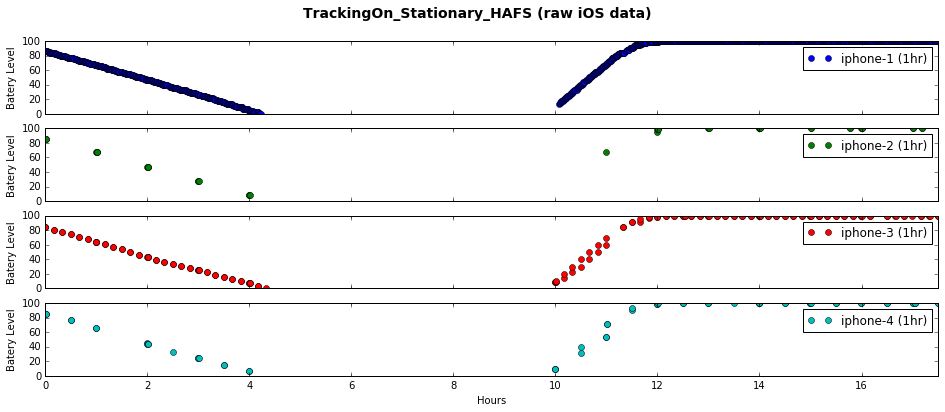

In [20]:
#iOS: No interplation on battery data
(afig, aaxes2d) = plt.subplots(ncols=1, nrows=4, sharex=True, sharey=True, figsize=(16,6))
aaxes = aaxes2d.flatten()

afig.suptitle(title + '(raw iOS data)', fontsize=14, fontweight='bold')

for i, df in enumerate(iphone_battery_df_list):
    print "About to plot %d" % i
    df['hr'] = (df.ts-iphone_start_ts)/3600.0
    df.plot(x='hr', y='battery_level_pct', style=style[i], ax=aaxes[i], label="iphone-%s (1hr)" % (i+1))
    aaxes[i].set_xlabel('Hours')
    aaxes[i].set_ylabel('Batery Level')
    aaxes[i].set_xlim(left=0)
    #plt.xticks(np.arange(0, max(df['hr'])+2, 2.0))
    
#afig.savefig('scatter_Apr_2-3_iOS.png')

About to plot 0
About to plot 1
About to plot 2
About to plot 3
ios 0: slope=4.75705321011 std_err=0.811190581742
ios 1: slope=4.44961193015 std_err=0.539544882931
ios 2: slope=4.88121546421 std_err=0.82387568075
ios 3: slope=4.73259833326 std_err=0.80437256463
4.70511973443


0.1579130325408481

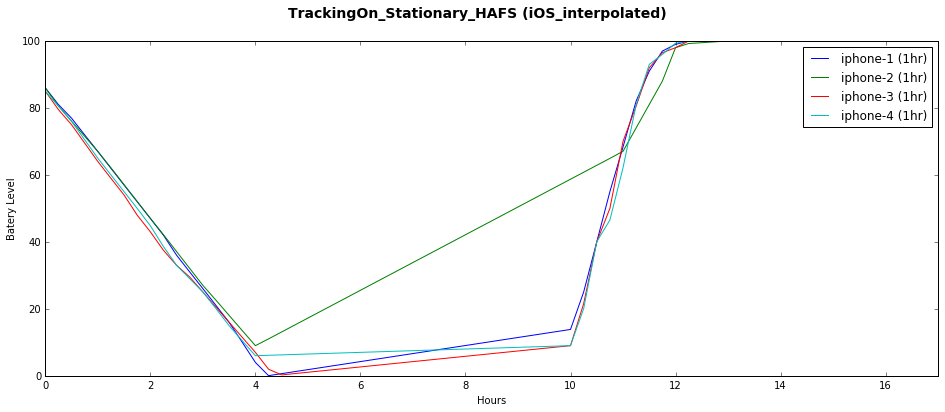

In [21]:
#iOS: With interplation on battery data 
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d
ifig.suptitle(title + '(iOS_interpolated)', fontsize=14, fontweight='bold')

for i, df in enumerate(iphone_battery_interp_df_list):
    print "About to plot %d" % i
    df['hr'] = (df.ts-iphone_start_ts)/3600.0
    df.plot(x='hr', y='battery_level_pct', ax=iaxes, xlim=(0, max(df['hr'])), label="iphone-%s (1hr)" % (i+1))
    iaxes.set_xlabel('Hours')
    iaxes.set_ylabel('Batery Level')
    plt.xticks(np.arange(0, max(df['hr']), 2.0))

#ifig.savefig('interp_Apr_2-3_iOS.png') 

total = []
from scipy import stats
for i, df in enumerate(iphone_battery_interp_df_list):
    notnull = df.battery_level_pct.notnull()
    slope, intercept, r_value, p_value, std_err = stats.linregress(df.hr[notnull], df.battery_level_pct[notnull])
    print "ios %d: " % i  + "slope="+str(slope) + " std_err="+str(std_err)
    total.append(slope)

print sum(total)/4
np.std(total)

About to plot 0
About to plot 1
About to plot 2
About to plot 3
About to plot 0
About to plot 1
About to plot 2
About to plot 3


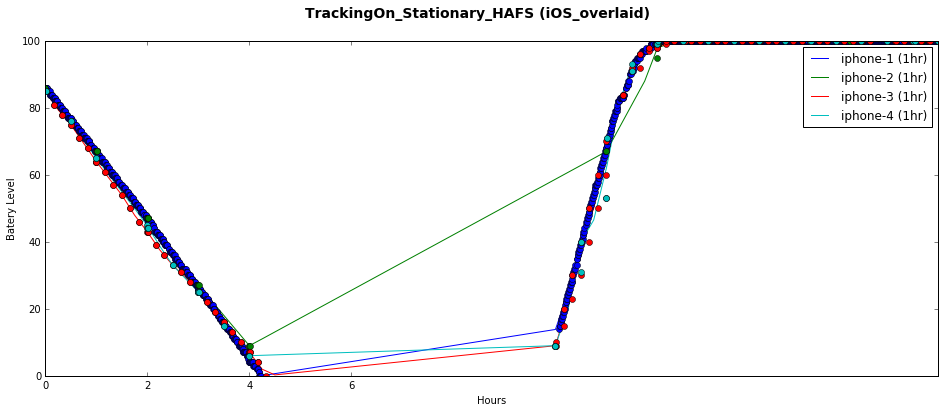

In [22]:
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d
ifig.suptitle(title + '(iOS_overlaid)', fontsize=14, fontweight='bold')

for i, df in enumerate(iphone_battery_interp_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', ax=iaxes, xlim=(0, 22), label="iphone-%s (1hr)" % (i+1), legend=True)

for i, df in enumerate(iphone_battery_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', style=style[i], ax=iaxes, xlim=(0, max(df.hr)), legend=False)
    iaxes.set_xlabel('Hours')
    iaxes.set_ylabel('Batery Level')
    plt.xticks(np.arange(0, 7, 2.0))

    
#ifig.savefig('overlaid_Apr_2-3_iOS.png')  

[[ 1.          0.94469288  0.99920635  0.99801499]
 [ 0.94469288  1.          0.93762229  0.93538373]
 [ 0.99920635  0.93762229  1.          0.99893685]
 [ 0.99801499  0.93538373  0.99893685  1.        ]]


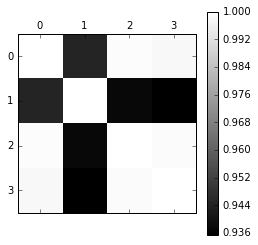

In [23]:
#iOS
#correlation analysis 
#generate list of iphone battery series 
iphone_battery_series_list = map(lambda b: b.battery_level_pct, iphone_battery_interp_df_list)
print np.corrcoef(iphone_battery_series_list)
plt.matshow(np.corrcoef(iphone_battery_series_list), cmap=plt.cm.gray)
plt.colorbar()

4
About to plot 0
About to plot 1
About to plot 2
About to plot 3


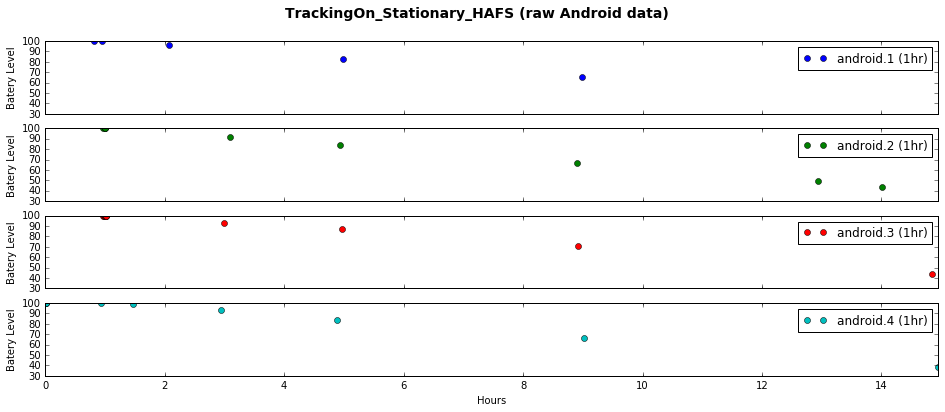

In [24]:
#Android: No interplation on battery data 
print len(android_battery_df_list)
(afig, aaxes2d) = plt.subplots(ncols=1, nrows=4, sharex=True, sharey=True, figsize=(16,6))
aaxes = aaxes2d.flatten()

afig.suptitle(title + '(raw Android data)', fontsize=14, fontweight='bold')

for i, df in enumerate(android_battery_df_list):
    print "About to plot %d" % i
    df['dt'] = df.ts.apply(ts_to_dt)
    df['hr'] = (df.ts-android_start_ts)/3600.0
    df.plot(x='hr', y='battery_level_pct', style=style[i], ax=aaxes[i], label="android.%s (1hr)" % (i+1))
    aaxes[i].set_xlabel('Hours')
    aaxes[i].set_ylabel('Batery Level')
    aaxes[i].set_xlim(left=0)
    #plt.xticks(np.arange(0, max(df['hr'])+2, 1))
    
#afig.savefig('scatter_Apr_2-3_Android.png')

About to plot 0
About to plot 1
About to plot 2
About to plot 3
android 0: slope=-4.5981432407 std_err=0.014735733111
android 1: slope=-4.34076373088 std_err=0.0110350913073
android 2: slope=-4.07161326648 std_err=0.0354559041733
android 3: slope=-4.39505106078 std_err=0.0334478930257
-4.35139282471


0.18787055930130292

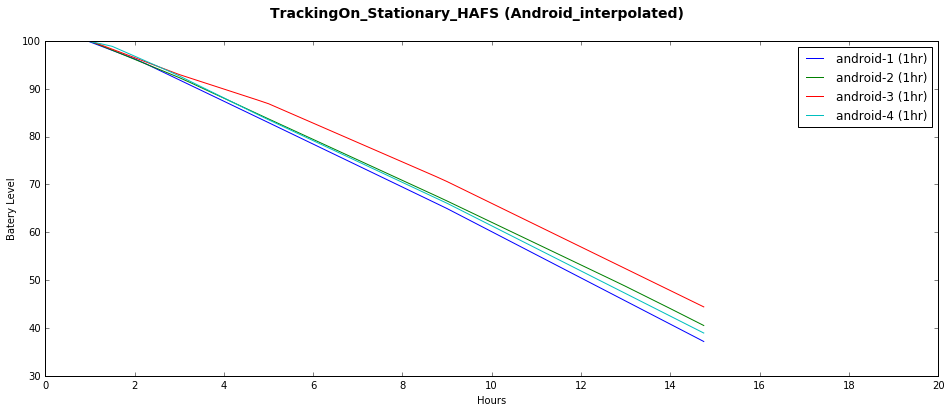

In [25]:
#Android: With interplation on battery data 
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d

ifig.suptitle(title + '(Android_interpolated)', fontsize=14, fontweight='bold')

for i, df in enumerate(android_battery_interp_df_list):
    print "About to plot %d" % i
    df['hr'] = (df.ts-android_start_ts)/3600.0
    df.plot(x='hr', y='battery_level_pct', ax=iaxes, xlim=(0, 20), label="android-%s (1hr)" % (i+1))
    iaxes.set_xlabel('Hours')
    iaxes.set_ylabel('Batery Level')
    plt.xticks(np.arange(0, 22, 2))
    
#ifig.savefig('interp_Apr_2-3_Android.png') 

total = []
from scipy import stats
for i, df in enumerate(android_battery_interp_df_list):
    notnull = df.battery_level_pct.notnull()
    slope, intercept, r_value, p_value, std_err = stats.linregress(df.hr[notnull], df.battery_level_pct[notnull])
    print "android %d: " % i  + "slope="+str(slope) + " std_err="+str(std_err)
    total.append(slope)
    
print sum(total)/4
np.std(total)

About to plot 0
About to plot 1
About to plot 2
About to plot 3
About to plot 0
About to plot 1
About to plot 2
About to plot 3


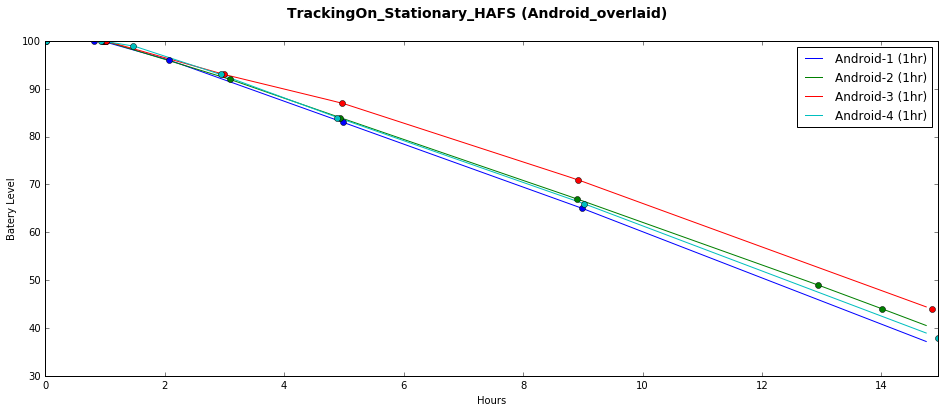

In [26]:
#Android: With interplation on battery data 
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d

ifig.suptitle(title + '(Android_overlaid)', fontsize=14, fontweight='bold')

for i, df in enumerate(android_battery_interp_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', ax=iaxes, xlim=(0, max(df.hr)), label="Android-%s (1hr)" % (i+1), legend=True)


for i, df in enumerate(android_battery_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', style=style[i], ax=iaxes, xlim=(0, max(df.hr)), legend=False)
    iaxes.set_xlabel('Hours')
    iaxes.set_ylabel('Batery Level')
    plt.xticks(np.arange(0, max(df['hr'])+1, 2))
    #plt.xticks(np.arange(min(df.dt), max(df.dt), 1))
    
#ifig.savefig('overlaid_Apr_2-3_Android.png') 

[[ nan  nan  nan  nan]
 [ nan  nan  nan  nan]
 [ nan  nan  nan  nan]
 [ nan  nan  nan   1.]]


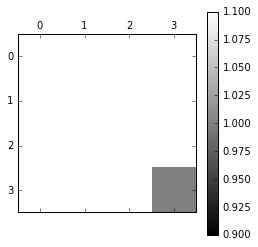

In [27]:
#Android 
#correlation analysis(tracking_off+stationary)
#generate list of android battery series 
android_battery_series_list = map(lambda b: b.battery_level_pct, android_battery_interp_df_list)
print np.corrcoef(android_battery_series_list)
plt.matshow(np.corrcoef(android_battery_series_list), cmap=plt.cm.gray)
plt.colorbar()

In [28]:
l = [1,2]
len(l)

2

In [29]:
l.append(3)
l
len(l)

3

In [30]:
iphone_ts = map(lambda u: esta.TimeSeries.get_time_series(u), iphone_ids)
android_ts = map(lambda u: esta.TimeSeries.get_time_series(u), android_ids)

iphone_time_range = estt.TimeQuery("metadata.write_ts", iphone_start_ts, iphone_end_ts)
android_time_range = estt.TimeQuery("metadata.write_ts", android_start_ts, android_end_ts)

iphone_battery_df_discharge_list = map(lambda t:t.get_data_df("background/battery", iphone_time_range), iphone_ts)
android_battery_df_discharge_list = map(lambda t:t.get_data_df("background/battery", android_time_range), android_ts)

<class 'pandas.core.series.Series'>
[  1.   0.  -9.   0. -11.   0. -20.  -1.   0.   0. -11.  -8.   0.   0. -10.
   0.  -9.   0.   3.   0.   0.  22.   9.  13.   0.  18.   0.  20.   2.   6.
   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
17
17
Empty DataFrame
Columns: [delta_b, delta_t, slope, ts, fmt_time, b]
Index: []


/Users/yawen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: slope, dtype: float64

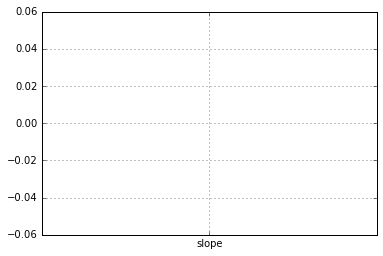

In [31]:
import numpy as np
itest = iphone_battery_df_discharge_list[3]
#print itest.battery_level_pct
print type(itest.battery_level_pct) #<class 'pandas.core.series.Series'>
b = itest.battery_level_pct
delta_b = np.diff(itest.battery_level_pct)
delta_b = np.insert(delta_b, 0, 1)
#print delta_b
ts = itest.metadata_write_ts

rate_df = pd.DataFrame({'delta_b':delta_b, 'ts':ts, 'b':b})
rate_df = rate_df[rate_df.delta_b!=0]
print delta_b
delta_b = rate_df.delta_b[1:]
delta_t = np.diff(rate_df.ts)/3600.0 #convert from seconds to hrs 
print len(delta_b)
print len(delta_t)
slope_df = pd.DataFrame({'delta_b':delta_b, 'delta_t':delta_t})
slope_df['slope'] = delta_b/delta_t
slope_df['ts'] = rate_df.ts[1:]
slope_df['fmt_time'] = slope_df.ts.apply(ts_to_dt)
slope_df['b'] = rate_df.b[1:]

#remove outliners 
slope_df = slope_df[slope_df.slope>-10 ]
slope_df = slope_df[slope_df.slope<-2 ]

print slope_df

#_, breaks=np.histogram(df.MAT,bins=1)
#(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
#iaxes = iaxes2d
ax = slope_df.boxplot(column='slope')
slope_df.slope.describe()